In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv("../../assets/data/soars_demo_trap_data.csv")

In [3]:
df.head()

,date,species,lat,lon,trap_type,species_count
0,11/21/1996 0:00,Culiseta inornata,-122.006667,37.933056,NJLT,2.0
1,8/27/1998 0:00,Culex pipiens,-118.045000,34.034167,NJLT,28.0
2,9/2/2015 0:00,Culex quinquefasciatus,-119.075278,35.326111,GRVD,33.0
3,3/30/1989 0:00,Culex tarsalis,-120.686678,36.890225,NJLT,6.0
4,10/13/2010 0:00,Culex stigmatosoma,-117.598675,33.898895,CO2,49.0


In [4]:
df.describe()

,lat,lon,species_count
count,75000.000000,75000.000000,69419.000000
mean,-120.061554,37.068115,32.083896
std,8.020881,2.815010,416.852374
min,-123.061028,0.000000,1.000000
25%,-121.752500,35.491830,1.000000
50%,-121.276070,37.692576,3.000000
75%,-119.188136,38.649444,10.000000
max,121.888004,42.229378,82147.000000


In [5]:
df_weather = pd.read_csv("../../assets/data/soars_demo_weather_data.csv")

In [6]:
df_weather.describe()

,year,month,day,lon,lat,raintot,tmaxavg
count,62831.000000,62831.000000,62831.000000,62831.000000,62831.000000,62831.000000,62831.000000
mean,2002.125830,7.128488,15.743439,-120.584381,37.293962,9.150658,-2.080293
std,9.603995,2.369200,8.779583,1.688764,1.983812,548.859531,544.767098
min,1981.000000,1.000000,1.000000,-123.061000,32.296100,-9999.000000,-9999.000000
25%,1995.000000,5.000000,8.000000,-121.767000,36.196700,0.000000,22.852100
50%,2005.000000,7.000000,16.000000,-121.305000,37.750100,12.000000,28.147900
75%,2010.000000,9.000000,23.000000,-119.350000,38.728800,52.000000,32.795800
max,2014.000000,12.000000,31.000000,-114.172000,41.139600,663.000000,43.697200


# Hypothesis-driven exploratory data analysis

We're going to being our exploration with a quick overview of the data of interest.  In the code above, we have two dataframes we'll work with.  The first `df` is the core trapping data.  In it we have decades of trapping data, giving us species, location and abundances.

**Basic inquiries**

|Question|Purpose|Method|
|--------|-------|------|
|What is the relationship between temperature and precipitation?| | correlation |
|Is there a relationship between abundances and temperature/precipitation?| | |
|Does trap type affect abundances? | | |


## Temperature v. Precipitation

Before we begin our investigation, let's make sure we're getting rid of data that shouldn't be there.  In other words, let's eliminate outliers and values that might look out of the ordinary.

In [27]:
temp_v_precip = df_weather[['tmaxavg','raintot']][(df_weather['tmaxavg']>0) & (df_weather['tmaxavg']<150) & (df_weather['raintot']>=0)]

Let's first visually inspect the data.

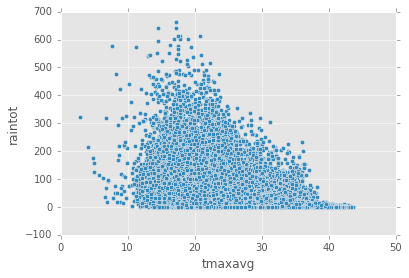

In [28]:
temp_v_precip.plot.scatter(x='tmaxavg',y='raintot')

We can see that the relationship seems to be a mostly negative correlation, where as tmaxavg increases, raintot (generally) decreases.  This is likely to be consistent with seasonal patterns in the region (less rain in the warmer summer months, more rain in the cooler fall/spring months), though such an assumption could be verified with actual data elsewhere.

In [29]:
temp_v_precip['tmaxavg'].corr(temp_v_precip['raintot'])

-0.47283117833709337

Confirming our visual inspection of the data, indeed there is a strong negative correlation of `0.47283`.

## Exploring mosquito abundance

Of course a natural outcome of this is to explore mosquito abundance.

#### Reshaping the data file for better granularity of dates

One of the things you might notice about the dates is that they are not in the same format as the weather data.  There are many ways to deal with this in Pandas, but we're going to go back to the basics and create a file that has the dates in a similar format for future reuse.  In particular, we're going to process the file to produce a new file with dates reformatted.

The [code is rather straightforward](./reshape.py), so take a look at the results [here](../data/soars_demo_trap_data_reshaped.csv).


In [10]:
df = pd.read_csv("../data/soars_demo_trap_data_reshaped.csv")

Now that we have some decent data, let's explore some of the basic abundance information.

NOTE: There are some addition cleanup tasks that will be left as an exercise.

### What is the abundance distribution over the data we have?

First, let's get and store just the data we're going to need to answer this question.  For now, we're not interested in the time/date information.

In [11]:
abundances_raw = df[['trap_type','species','species_count']]

In [12]:
# just a quick sanity check
abundances_raw.head()

,trap_type,species,species_count
0,NJLT,Culiseta inornata,2.0
1,NJLT,Culex pipiens,28.0
2,GRVD,Culex quinquefasciatus,33.0
3,NJLT,Culex tarsalis,6.0
4,CO2,Culex stigmatosoma,49.0


### By species:

In [13]:
df.groupby(['species']).sum()['species_count'].sort_values(ascending=False)

species
Culex tarsalis               586648.0
Anopheles freeborni          407324.0
Aedes melanimon              373767.0
Culex pipiens                173126.0
Culex quinquefasciatus       147944.0
Chironomidae                 142866.0
Culex erythrothorax          126250.0
Culiseta inornata             56781.0
Aedes nigromaculis            41361.0
Culicoides sonorensis         28524.0
Psorophora columbiae          26804.0
Culex stigmatosoma            23571.0
Aedes vexans                  22642.0
Culiseta incidens             21353.0
Culicoides occidentalis        9543.0
Anopheles franciscanus         7839.0
Aedes sierrensis               7122.0
Aedes increpitus               3016.0
Culiseta particeps             2524.0
Aedes dorsalis                 2307.0
Culicoides                     2222.0
Aedes washinoi                 2074.0
Anopheles punctipennis         1499.0
Aedes albopictus               1255.0
Culicoides reevesi             1150.0
Anopheles hermsi               1066.0
Coqu

### Top 20 ...

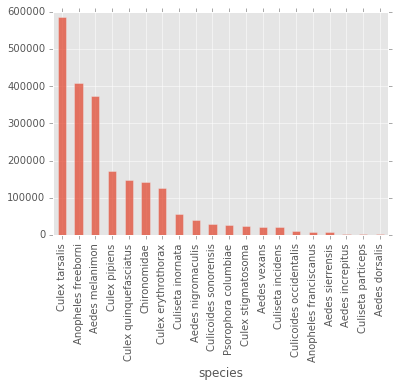

In [14]:
df.groupby(['species']).sum()['species_count'].sort_values(ascending=False).head(20).plot(kind='bar', rot=90, alpha=0.75)

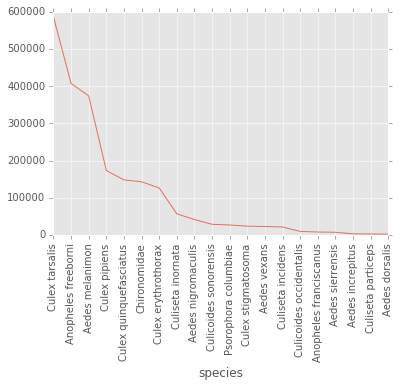

In [15]:
df.groupby(['species']).sum()['species_count'].sort_values(ascending=False).head(20).plot(rot=90, alpha=0.75, xticks=xrange(20))

I'm not qualified to determine if :

* Culex tarsalis               
* Anopheles freeborni          
* Aedes melanimon              
* Culex pipiens                
* Culex quinquefasciatus       
* Chironomidae                 
* Culex erythrothorax          
* Culiseta inornata            
* Aedes nigromaculis           
* Culicoides sonorensis

(in that order) are the big bad wolves of the mosquito world.

## By trap type ...

In [16]:
df.groupby(['trap_type']).sum()['species_count'].sort_values(ascending=False)

trap_type
NJLT           1548521.0
CO2             506744.0
GRVD             99244.0
MMT              35132.0
OTHER            20082.0
USDS              6909.0
REST              5639.0
BGSENT            1211.0
INSP              1127.0
CDCAGO             810.0
OVI                446.0
WRKR               424.0
FLANNEL            344.0
SWEEPNET           217.0
BBT                200.0
MBT                 87.0
OVI-PRES            63.0
BTLJC               26.0
CDCAGO-PRES          2.0
MODAGO               2.0
Name: species_count, dtype: float64

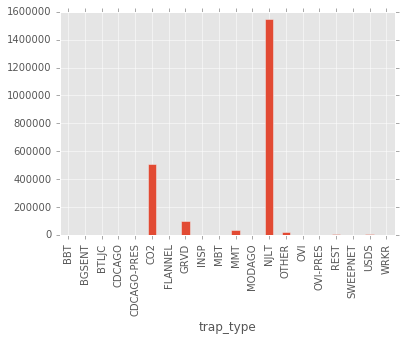

In [17]:
df.groupby(['trap_type']).sum()['species_count'].plot(kind='bar')

Again, I'm not sure whether NJLT and CO2 are supposed to be 10.5 and 5 times bigger than the GRVD (respectively, but maybe it is time to call in someone who knows, so we can feel more confident about our results so far ...).

### Hypothesis: Aggregate species abundances by trap type follow a binomial distribution.

Answering this with the evidence we've collected so far and perhaps looking at some more is left as an exercise for the curious ...

In [40]:
abundances_raw[abundances_raw['trap_type'] == 'NJLT'].groupby(['species']).sum()['species_count'].sort_values(ascending=False).head(10)

species
Culex tarsalis          403150.0
Anopheles freeborni     380616.0
Aedes melanimon         343348.0
Chironomidae            142866.0
Culex pipiens            97521.0
Culiseta inornata        52750.0
Aedes nigromaculis       40118.0
Psorophora columbiae     22185.0
Culex stigmatosoma       18708.0
Culex erythrothorax      12074.0
Name: species_count, dtype: float64

In [41]:
abundances_raw[abundances_raw['trap_type'] == 'CO2'].groupby(['species']).sum()['species_count'].sort_values(ascending=False).head(10)

species
Culex tarsalis             154342.0
Culex erythrothorax        113774.0
Culex quinquefasciatus      69214.0
Culex pipiens               46500.0
Culicoides sonorensis       26347.0
Aedes melanimon             23692.0
Aedes vexans                17195.0
Culiseta incidens           11390.0
Anopheles freeborni          8844.0
Culicoides occidentalis      5232.0
Name: species_count, dtype: float64

## Exploring details _Culex tarsalis_ and _Anopheles freeborni_


In [18]:
df[df['species'] == 'Culex tarsalis'].groupby(['year']).sum()['species_count'].head()

year
1952      67.0
1953     373.0
1954    1722.0
1955    1635.0
1956     692.0
Name: species_count, dtype: float64

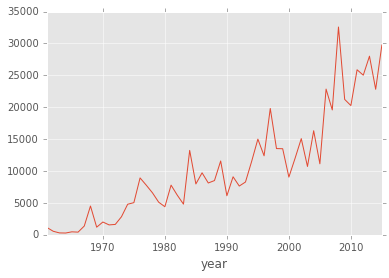

In [42]:
df[(df['species'] == 'Culex tarsalis') & (df['year'] < 2016) & (df['year']>1960)].groupby(['year']).sum()['species_count'].plot()

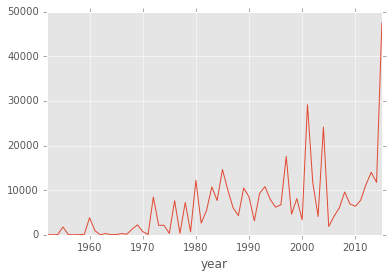

In [20]:
df[(df['species'] == 'Anopheles freeborni') & (df['year'] < 2016)].groupby(['year']).sum()['species_count'].plot()

## Exploring precipation and temperature

### Precipitation

We want to see how precipition has changed over time and also look at how that would compare with the abundances of a specific species.

Let's get going ...

In [21]:
df_weather[(df_weather['raintot']>0) & (df_weather['raintot']<2000)][['raintot','year']].groupby('year').mean()

,raintot
year,
1981,64.049451
1982,51.181818
1983,74.366826
1984,106.531561
1985,22.181388
1986,27.426323
1987,88.364826
1988,52.915761
1989,32.526252


### Looking at a single species and precipitation


#### _Culex tarsalis_

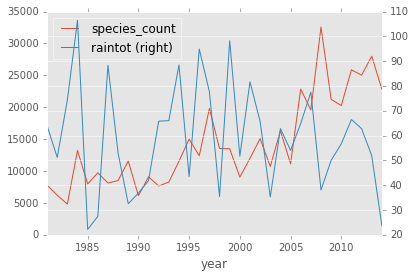

In [22]:
# Let's break out our mosquito data  for the years we have temperature / precipitation data
culextarsalis_1981_2014 = df[(df['species'] == 'Culex tarsalis') & ((df['year'] > 1980) & (df['year'] < 2015))].groupby(['year']).sum()['species_count']
weather_1981_2014 = df_weather[(df_weather['raintot']>0) & (df_weather['raintot']<2000)][['raintot','year']].groupby('year').mean()

pd.DataFrame(culextarsalis_1981_2014).join(weather_1981_2014).plot(secondary_y=['raintot'])


#### _Culex pipiens_

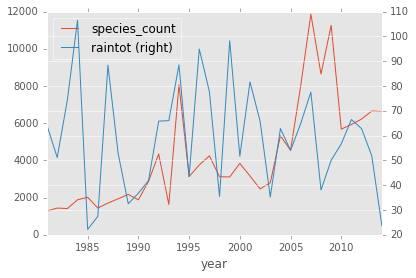

In [23]:
culex_pipiens_1981_2014 = df[(df['species'] == 'Culex pipiens') & ((df['year'] > 1980) & (df['year'] < 2015))].groupby(['year']).sum()['species_count']

pd.DataFrame(culex_pipiens_1981_2014).join(weather_1981_2014).plot(secondary_y=['raintot'])

So much more fun can be had ... and there are a number of outstanding questions worth exploring :

* Species found over time,
* Distrubution of species _within_ trap types (and over time),
* Distribution by geographic contraints ... and much more!


## Fun with Folium 

Now we're going to get into some extra special fun (if the last set didn't get you excited, this should!).

Folum is a library for creating maps in Python.  It is pretty new, but it is also very cool.

### Installation 

Let's try to install folium with :

    pip install folium


### Your first map

In [24]:
import folium
map_osm = folium.Map(location=[37.733795, -122.446747])
map_osm

In [25]:
folium.Marker([37.293962, -120.584381 ], popup='Weather data mean lat/lon').add_to(map_osm)
map_osm

## Adding markers and having REAL fun ...

In [26]:
for idx, r in df[(df['species'] == 'Culex pipiens') & (df['year'] == 1980) & (df['month'] == 4)].iterrows():
    folium.Marker([r['lon'], r['lat']], popup=
                  'lat/lon:{}/{}\ntrap type:{}\ncount: {}\ndate:{}/{}/{}'.\
                  format(r['lat'],r['lon'],r['trap_type'],r['species_count'],r['month'],r['day'],r['year'])).\
                  add_to(map_osm)
map_osm

Let's [explore](https://folium.readthedocs.io/en/latest/) together ...